# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    

    # Add 1 to the record count
    record_count += 1
    
    # sleep count
    sleep_count = 0
    
    while sleep_count < 1:
        time.sleep(1)
        sleep_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vestmannaeyjar
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | flinders
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | bonthe
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | clarence town
Processing Record 9 of Set 1 | zeya
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | formosa
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | tarko-sale
Processing Record 18 of Set 1 | temaraia
City not found. Skipping...
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | faanui
Processing Record

Processing Record 39 of Set 4 | manfredonia
Processing Record 40 of Set 4 | emerald
Processing Record 41 of Set 4 | zemio
Processing Record 42 of Set 4 | ninghai
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | anzio
Processing Record 45 of Set 4 | puerto colombia
Processing Record 46 of Set 4 | tepetlaoxtoc
City not found. Skipping...
Processing Record 47 of Set 4 | hirara
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | santa fe
Processing Record 0 of Set 5 | lalibela
Processing Record 1 of Set 5 | tuktoyaktuk
Processing Record 2 of Set 5 | edson
Processing Record 3 of Set 5 | urubicha
Processing Record 4 of Set 5 | esperance
Processing Record 5 of Set 5 | gornyak
Processing Record 6 of Set 5 | ambon
Processing Record 7 of Set 5 | gamba
Processing Record 8 of Set 5 | chodavaram
Processing Record 9 of Set 5 | manaure
Processing Record 10 of Set 5 | poum
Processing Record 11 of Set 5 | waki
Processing Record 12 of Set 5 | isa

Processing Record 31 of Set 8 | xiuyan
Processing Record 32 of Set 8 | north platte
Processing Record 33 of Set 8 | santa elena
Processing Record 34 of Set 8 | guerrero negro
Processing Record 35 of Set 8 | burica
City not found. Skipping...
Processing Record 36 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 37 of Set 8 | lufilufi
Processing Record 38 of Set 8 | farmington
Processing Record 39 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 40 of Set 8 | nybro
Processing Record 41 of Set 8 | sao gabriel da cachoeira
Processing Record 42 of Set 8 | ancud
Processing Record 43 of Set 8 | ribeira brava
Processing Record 44 of Set 8 | katsuura
Processing Record 45 of Set 8 | teya
Processing Record 46 of Set 8 | galesong
Processing Record 47 of Set 8 | nanlong
Processing Record 48 of Set 8 | puerto palomas
Processing Record 49 of Set 8 | luganville
Processing Record 0 of Set 9 | ziyang
Processing Record 1 of Set 9 | hede
Processing Record 2 of Set 9 | 

Processing Record 13 of Set 12 | tilichiki
Processing Record 14 of Set 12 | palaia fokaia
Processing Record 15 of Set 12 | saint-leu
Processing Record 16 of Set 12 | ouallam
Processing Record 17 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 18 of Set 12 | chandbali
Processing Record 19 of Set 12 | impfondo
Processing Record 20 of Set 12 | aqtobe
Processing Record 21 of Set 12 | san quintin
Processing Record 22 of Set 12 | klaksvik
Processing Record 23 of Set 12 | birin
Processing Record 24 of Set 12 | lagoa
Processing Record 25 of Set 12 | vao
Processing Record 26 of Set 12 | aracoiaba
Processing Record 27 of Set 12 | asheboro
Processing Record 28 of Set 12 | bonfim
Processing Record 29 of Set 12 | usevya
Processing Record 30 of Set 12 | fort saint james
Processing Record 31 of Set 12 | aguimes
Processing Record 32 of Set 12 | porto novo
Processing Record 33 of Set 12 | ostuacan
Processing Record 34 of Set 12 | vanavara
Processing Record 35 of Set 12 | 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vestmannaeyjar,63.4427,-20.2734,-5.02,55,20,9.07,IS,1678219967
1,flinders,-34.5833,150.8552,18.36,66,0,0.89,AU,1678219730
2,punta arenas,-53.1500,-70.9167,15.06,44,40,15.43,CL,1678219971
3,east london,-33.0153,27.9116,22.18,88,100,4.31,ZA,1678219842
4,bonthe,7.5264,-12.5050,26.26,73,98,4.10,SL,1678219973


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vestmannaeyjar,63.4427,-20.2734,-5.02,55,20,9.07,IS,1678219967
1,flinders,-34.5833,150.8552,18.36,66,0,0.89,AU,1678219730
2,punta arenas,-53.1500,-70.9167,15.06,44,40,15.43,CL,1678219971
3,east london,-33.0153,27.9116,22.18,88,100,4.31,ZA,1678219842
4,bonthe,7.5264,-12.5050,26.26,73,98,4.10,SL,1678219973


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

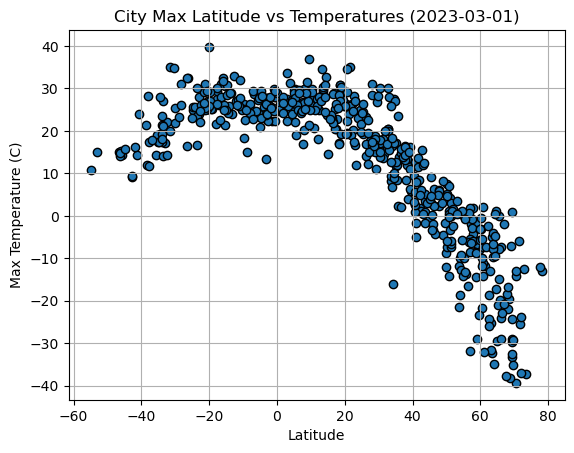

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.grid(visible=True, linestyle='-')
plt.title("City Max Latitude vs Temperatures (2023-03-01)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

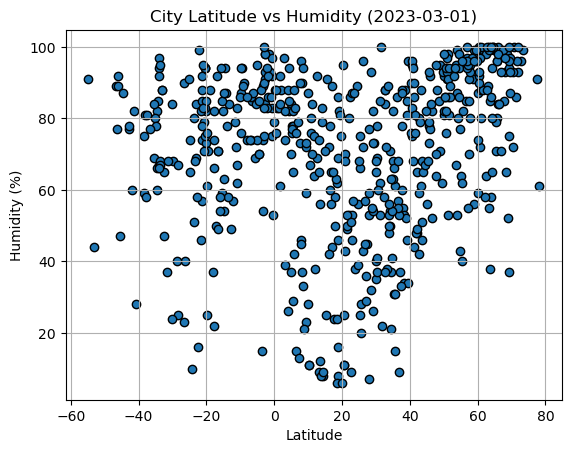

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.grid(visible=True, linestyle='-')
plt.title("City Latitude vs Humidity (2023-03-01)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

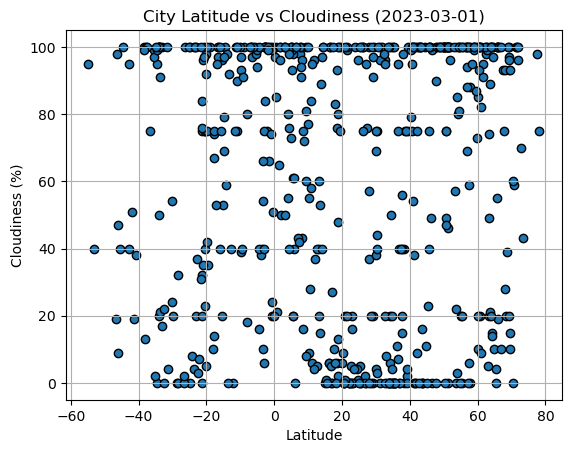

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.grid(visible=True, linestyle='-')
plt.title("City Latitude vs Cloudiness (2023-03-01)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

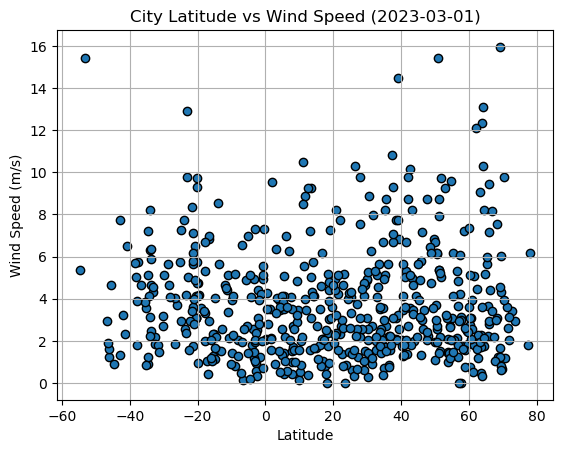

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.grid(visible=True, linestyle='-')
plt.title("City Latitude vs Wind Speed (2023-03-01)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
# Asked Professor if we needed to create a function to generate the linear regression plots of if we could do them manually.
# he said that we can do them manually.

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vestmannaeyjar,63.4427,-20.2734,-5.02,55,20,9.07,IS,1678219967
4,bonthe,7.5264,-12.5050,26.26,73,98,4.10,SL,1678219973
7,zeya,53.7500,127.2667,-21.46,95,22,1.43,RU,1678219977
10,upernavik,72.7868,-56.1549,-12.45,96,70,3.40,GL,1678219713
13,barrow,71.2906,-156.7887,-5.99,86,100,3.60,US,1678219985


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,flinders,-34.5833,150.8552,18.36,66,0,0.89,AU,1678219730
2,punta arenas,-53.1500,-70.9167,15.06,44,40,15.43,CL,1678219971
3,east london,-33.0153,27.9116,22.18,88,100,4.31,ZA,1678219842
5,bredasdorp,-34.5322,20.0403,18.16,82,95,1.21,ZA,1678219763
6,clarence town,-32.5833,151.7833,22.14,47,0,2.19,AU,1678219976


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8970538236131459


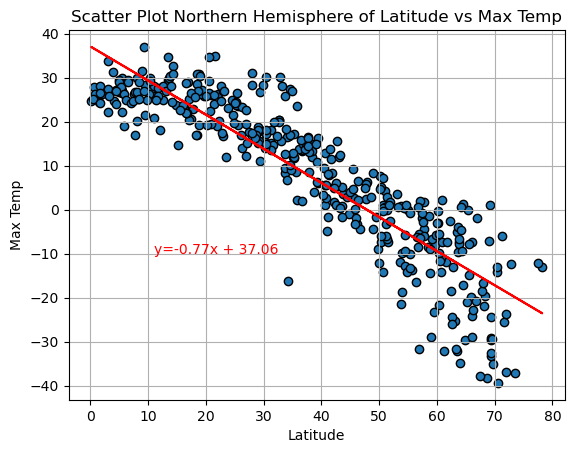

In [19]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker='o', edgecolor='black')

#perform the linear regression
(slope, intercept, rvalue, pvalue, sterr)=stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
r_value = rvalue
# generate the data points for the regression line
regressionValues = northern_hemi_df["Lat"] * slope + intercept

# line of best fit equation
lineEQ = f"y={slope:.2f}x + {intercept:.2f}"
# print the regression line
plt.plot(northern_hemi_df["Lat"], regressionValues, "r-")
# annotate the equation on to the graph
plt.annotate(lineEQ, (11, -10), color = "red")

plt.title("Scatter Plot Northern Hemisphere of Latitude vs Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(visible=True, linestyle='-')
plt.show
print(f"The r-value is: {r_value}")

The r-value is: 0.5294514519666403


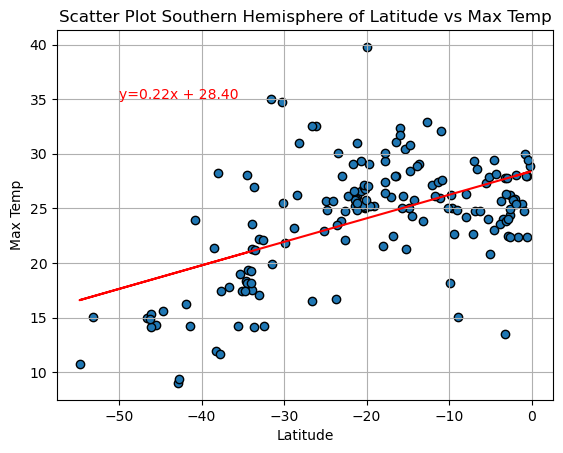

In [20]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker='o', edgecolor='black')

#perform the linear regression
(slope, intercept, rvalue, pvalue, sterr)=stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
r_value = rvalue
# generate the data points for the regression line
regressionValues = southern_hemi_df["Lat"] * slope + intercept

# line of best fit equation
lineEQ = f"y={slope:.2f}x + {intercept:.2f}"
# print the regression line
plt.plot(southern_hemi_df["Lat"], regressionValues, "r-")
# annotate the equation on to the graph
plt.annotate(lineEQ, (-50, 35), color = "red")

plt.title("Scatter Plot Southern Hemisphere of Latitude vs Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(visible=True, linestyle='-')
plt.show
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** There is a very strong negative correlation in the Maximum Temperature vs Latitude in the Northern Hemisphere, compared to the moderately strong correlation in the Maximum Temperature vs Lattitude in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4216216275634286


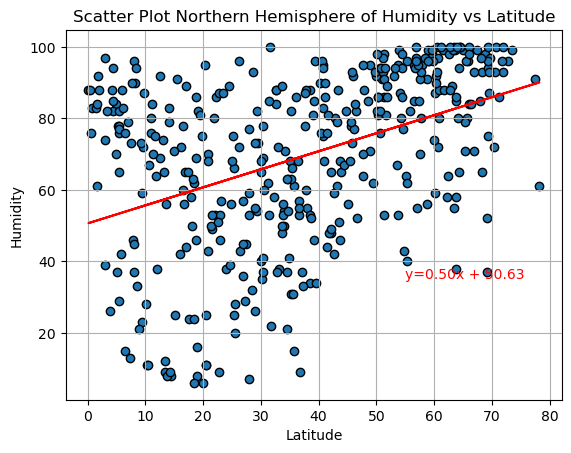

In [21]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker='o', edgecolor='black')

#perform the linear regression
(slope, intercept, rvalue, pvalue, sterr)=stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
r_value = rvalue
# generate the data points for the regression line
regressionValues = northern_hemi_df["Lat"] * slope + intercept

# line of best fit equation
lineEQ = f"y={slope:.2f}x + {intercept:.2f}"
# print the regression line
plt.plot(northern_hemi_df["Lat"], regressionValues, "r-")
# annotate the equation on to the graph
plt.annotate(lineEQ, (55, 35), color = "red")

plt.title("Scatter Plot Northern Hemisphere of Humidity vs Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(visible=True, linestyle='-')
plt.show
print(f"The r-value is: {r_value}")

The r-value is: 0.19539920523424126


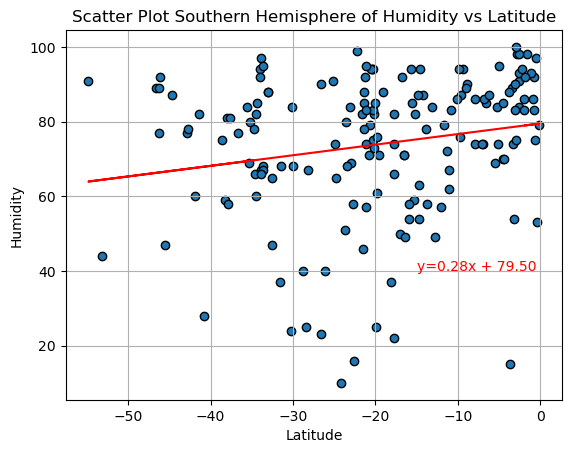

In [22]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker='o', edgecolor='black')

#perform the linear regression
(slope, intercept, rvalue, pvalue, sterr)=stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
r_value = rvalue
# generate the data points for the regression line
regressionValues = southern_hemi_df["Lat"] * slope + intercept

# line of best fit equation
lineEQ = f"y={slope:.2f}x + {intercept:.2f}"
# print the regression line
plt.plot(southern_hemi_df["Lat"], regressionValues, "r-")
# annotate the equation on to the graph
plt.annotate(lineEQ, (-15, 40), color = "red")

plt.title("Scatter Plot Southern Hemisphere of Humidity vs Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(visible=True, linestyle='-')
plt.show
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** There is a weak positive correlation between humidity vs latitude in the Northern Hemisphere, compared to a very week to no correlation between humidty vs latitude in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13594524302955863


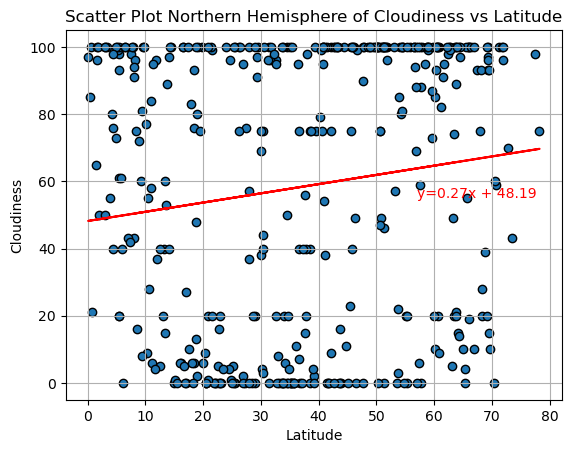

In [23]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker='o', edgecolor='black')

#perform the linear regression
(slope, intercept, rvalue, pvalue, sterr)=stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
r_value = rvalue
# generate the data points for the regression line
regressionValues = northern_hemi_df["Lat"] * slope + intercept

# line of best fit equation
lineEQ = f"y={slope:.2f}x + {intercept:.2f}"
# print the regression line
plt.plot(northern_hemi_df["Lat"], regressionValues, "r-")
# annotate the equation on to the graph
plt.annotate(lineEQ, (57, 55), color = "red")

plt.title("Scatter Plot Northern Hemisphere of Cloudiness vs Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(visible=True, linestyle='-')
plt.show
print(f"The r-value is: {r_value}")

The r-value is: 0.15321157130866375


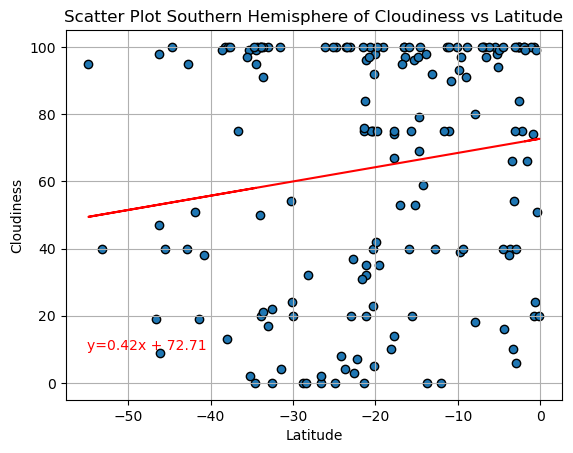

In [24]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker='o', edgecolor='black')

#perform the linear regression
(slope, intercept, rvalue, pvalue, sterr)=stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
#get r-value
r_value = rvalue
# generate the data points for the regression line
regressionValues = southern_hemi_df["Lat"] * slope + intercept

# line of best fit equation
lineEQ = f"y={slope:.2f}x + {intercept:.2f}"
# print the regression line
plt.plot(southern_hemi_df["Lat"], regressionValues, "r-")
# annotate the equation on to the graph
plt.annotate(lineEQ, (-55, 10), color = "red")

plt.title("Scatter Plot Southern Hemisphere of Cloudiness vs Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(visible=True, linestyle='-')
plt.show
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** There is almost no correlation of the cloudiness vs latitude in the northern and southern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10530822249318397


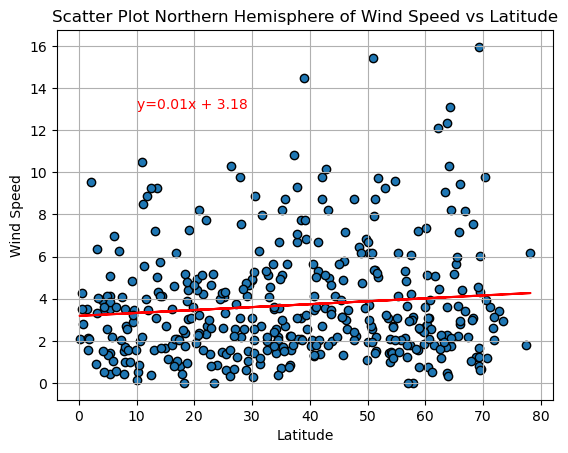

In [25]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker='o', edgecolor='black')

#perform the linear regression
(slope, intercept, rvalue, pvalue, sterr)=stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
r_value = rvalue
# generate the data points for the regression line
regressionValues = northern_hemi_df["Lat"] * slope + intercept

# line of best fit equation
lineEQ = f"y={slope:.2f}x + {intercept:.2f}"
# print the regression line
plt.plot(northern_hemi_df["Lat"], regressionValues, "r-")
# annotate the equation on to the graph
plt.annotate(lineEQ, (10, 13), color = "red")

plt.title("Scatter Plot Northern Hemisphere of Wind Speed vs Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(visible=True, linestyle='-')
plt.show
print(f"The r-value is: {r_value}")

The r-value is: -0.21266080772852516


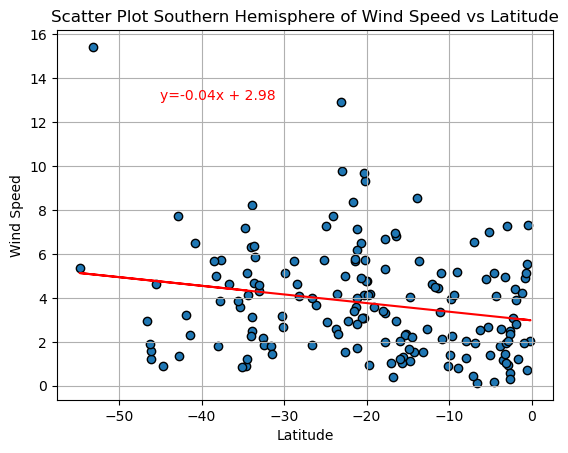

In [26]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker='o', edgecolor='black')

#perform the linear regression
(slope, intercept, rvalue, pvalue, sterr)=stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
#get r-value
r_value = rvalue
# generate the data points for the regression line
regressionValues = southern_hemi_df["Lat"] * slope + intercept

# line of best fit equation
lineEQ = f"y={slope:.2f}x + {intercept:.2f}"
# print the regression line
plt.plot(southern_hemi_df["Lat"], regressionValues, "r-")
# annotate the equation on to the graph
plt.annotate(lineEQ, (-45, 13), color = "red")

plt.title("Scatter Plot Southern Hemisphere of Wind Speed vs Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(visible=True, linestyle='-')
plt.show
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** There is a very weak positive correlation for the wind speed vs latitude in the northern hemisphere, and there is a negative correlation for the wind speed vs latitude in the southern hemisphere. 